# SMAI Assignment - 3

## Question - `1` : Support Vector Machines

This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [2]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
from sklearn.svm import SVC
from cvxpy import *
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy import linalg as LA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Subsection 1

In [2]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

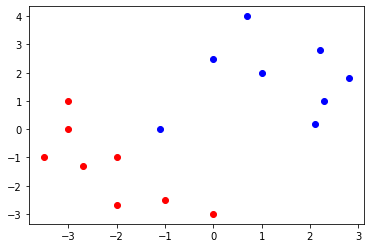

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

In [4]:
# Write your code here
def Hard_margin(X,y):
  #defining dimensionality of w , b
  W = cp.Variable((X.shape[1], 1)) 
  b = cp.Variable() 
  
  ##as objective is mentioned to maximize the margin
  objective = cp.Minimize(cp.norm(W, X.shape[1])) 
  # x = wT * x[i] + b
  ## rather than doing this put all workload on yi * (wi^T.x + b)
  constraints = [y[i] * ((W.T @ X[i]) + b) >= 1 for i in range(X.shape[0])]

  QCQP = cp.Problem(objective , constraints)
  QCQP.solve()

  return W.value,b.value




In [5]:
w,b = Hard_margin(X,y)
print("W =",w)
print("b =",b)

W = [[-1.73913043]
 [-1.30434783]]
b = -2.9130434783188317


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [6]:
# Write your code here
def plot_margins(X,y,w,b):
  plot_points(X, y)
  #w[0]*x + w[1]*y + b = 0
  #Solving for y, we get y = (-b - w[0]*x) / w[1]
  mid_left = (-b - (w[0]*X) + 1)/ w[1]
  mid = (-b - (w[0]*X))/w[1]
  mid_right = (-b - (w[0]*X) - 1)/w[1]
  plt.plot(X, mid_left, 'r--')
  plt.plot(X, mid, 'g')
  plt.plot(X, mid_right, 'b--')

    
 

    
 

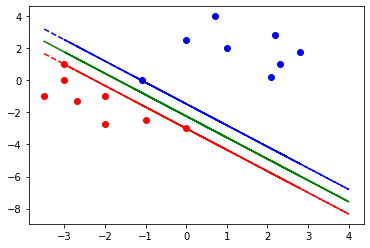

In [ ]:
plot_margins(X, y, w, b)

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.

In [7]:
type(X)

numpy.ndarray

[[ -3.5  -1. ]
 [ -3.    0. ]
 [ -3.    1. ]
 [ -2.7  -1.3]
 [ -2.   -1. ]
 [ -2.   -2.7]
 [ -1.   -2.5]
 [  0.   -3. ]
 [ -1.1   0. ]
 [  0.    2.5]
 [  1.    2. ]
 [  0.7   4. ]
 [  2.1   0.2]
 [  2.3   1. ]
 [  2.8   1.8]
 [  2.2   2.8]
 [ -4.  -10. ]
 [  4.    4. ]]
[ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1]
(18, 2) (18,)


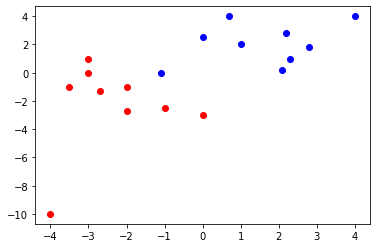

In [8]:
# Re-create the Synthetic Data by adding the points and visualize the points
new_point1 = np.array([-4, -10])
new_point2 = np.array([4, 4])
X = np.vstack((X, new_point1))
X = np.vstack((X, new_point2))
print(X)
new_values = np.array([1, -1])
y = np.concatenate((y, new_values))
print(y)
print(X.shape, y.shape)

plot_points(X, y)
plt.show()

W = [[-1.73913044]
 [-1.30434783]]
b = -2.9130434790774022


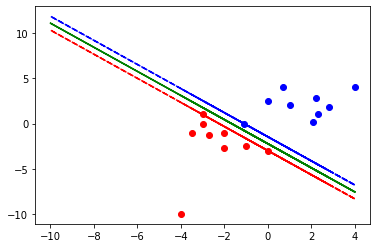

In [9]:
# Solve for the decision boundary using this modified dataset
w,b = Hard_margin(X,y)
print("W =",w)
print("b =",b)
plot_margins(X, y, w, b)


Addition of two new points doesnot change the decision boundaries. The reason being that addition of these two points does not result in change of support vectors.

# SOFT MARGIN STARTED
  Now, we are going to minimize errors instead of increasing margins
  

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

# info
In a soft margin SVM, slack variables are introduced to handle situations where the data points are not linearly separable by the decision boundary. The slack variables allow the optimization algorithm to tolerate a certain amount of misclassification by allowing some points to be on the wrong side of the margin or even on the wrong side of the hyperplane.

In [10]:
def Soft_margin(X,y,C):
  #defining dimensionality of w , b
  W = cp.Variable((X.shape[1], 1)) 
  b = cp.Variable()
  Slack_i = cp.Variable((X.shape[0],1)) 
  
  ##as objective is mentioned to maximize the margin
 # Define objective and constraints
  objective = cp.Minimize(cp.norm(W, X.shape[1]) + C * cp.sum(Slack_i))
  constraints = [y[i] * ((W.T @ X[i]) + b) + Slack_i[i] >= 1 for i in range(X.shape[0])] + [Slack_i >= 0] 
 
  QCQP = cp.Problem(objective , constraints)
  QCQP.solve()

  return W.value,b.value


W is:  [[-1.43252823e-12]
 [-1.55765966e-12]]
b is:  0.06885090600131433


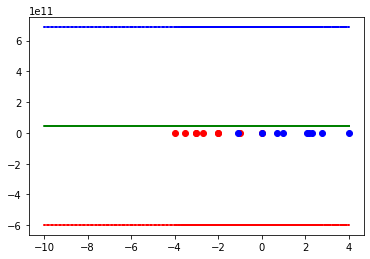

In [11]:
# Write your code here for C= 0.01
C = 0.01
w, b = Soft_margin(X, y, C)
print("W is: ", w)
print("b is: ", b)
plot_margins(X, y, w, b)

W is:  [[-0.35022764]
 [-0.29954473]]
b is:  -0.0506829064868531


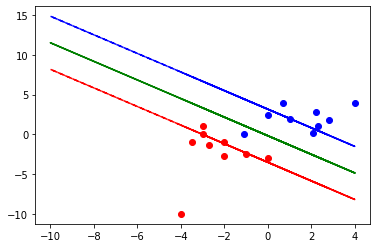

In [12]:
# Write your code here for C= 0.1
C = 0.1
w, b = Soft_margin(X, y, C)
print("W is: ", w)
print("b is: ", b)
plot_margins(X, y, w, b)

W is:  [[-1.73913044]
 [-1.30434783]]
b is:  -2.9130434786853834


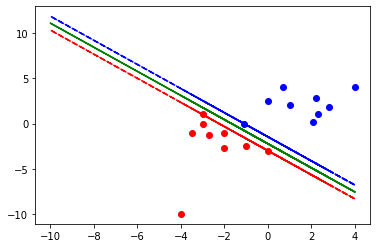

In [13]:
# Write your code here for C= 3
C = 3
w, b = Soft_margin(X, y, C)
print("W is: ", w)
print("b is: ", b)
plot_margins(X, y, w, b)

W is:  [[-1.73913044]
 [-1.30434783]]
b is:  -2.913043478796321


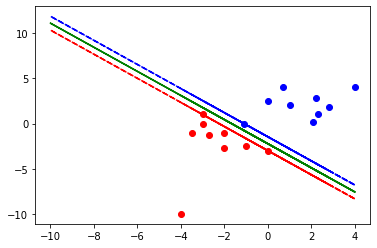

In [14]:
# Write your code here for C= 10
C = 10
w, b = Soft_margin(X, y, C)
print("W is: ", w)
print("b is: ", b)
plot_margins(X, y, w, b)

W is:  [[-1.73913043]
 [-1.30434783]]
b is:  -2.913043478442616


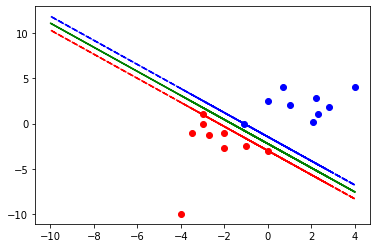

In [15]:
# Write your code here for C= 100
C = 100
w, b = Soft_margin(X, y, C)
print("W is: ", w)
print("b is: ", b)
plot_margins(X, y, w, b)

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

In [16]:
# Write your Code here
print(X,"\n\n",y)

[[ -3.5  -1. ]
 [ -3.    0. ]
 [ -3.    1. ]
 [ -2.7  -1.3]
 [ -2.   -1. ]
 [ -2.   -2.7]
 [ -1.   -2.5]
 [  0.   -3. ]
 [ -1.1   0. ]
 [  0.    2.5]
 [  1.    2. ]
 [  0.7   4. ]
 [  2.1   0.2]
 [  2.3   1. ]
 [  2.8   1.8]
 [  2.2   2.8]
 [ -4.  -10. ]
 [  4.    4. ]] 

 [ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1]


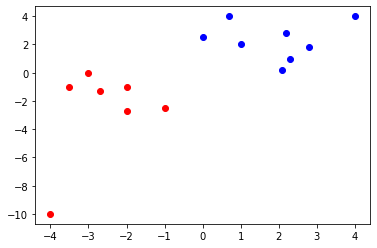

In [17]:
### removed support vectors
# [[-3.   1. ],  [ 0.  -3. ],  [-1.1  0. ]] {2,7,8}
X_new = X[[0,1,3,4,5,6,9,10,11,12,13,14,15,16,17]]
y_new = y[[0,1,3,4,5,6,9,10,11,12,13,14,15,16,17]]
plot_points(X_new, y_new)
plt.show()

W is:  [[-0.38493724]
 [-0.35146444]]
b is:  -0.12133891213291795


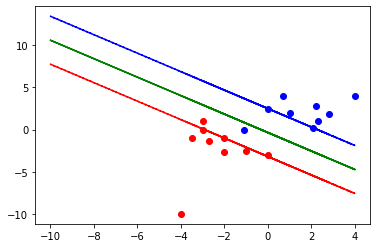

In [18]:
C = 100
w, b = Soft_margin(X_new, y_new, C)
print("W is: ", w)
print("b is: ", b)
plot_margins(X, y, w, b)

After removing the support vectors, the decision boundry changes as new set of support vectors are obtained with in increase of distance between the margin.

### Subsection 2

In [5]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-03-28 16:19:52--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2023-03-28 16:19:53 (87.6 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-28 16:19:53--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
L

In [6]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [7]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [8]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [9]:
# use this subset of data for training and testing

batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 784)
(3000,)
(3000, 784)
(3000,)


In [11]:
q2 = SVC()
q2.fit(X_train,y_train)
prediction = q2.predict(X_test)


In [12]:
#Accuracy score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy = accuracy_score(prediction, y_test)
print('Accuracy: ', accuracy_score(prediction, y_test))
print('confusion matrix: ', confusion_matrix(y_test, prediction))
print('F1-Score: ', f1_score(y_test, prediction, average='weighted'))

Accuracy:  0.9336666666666666
confusion matrix:  [[293   0   1   0   1   1   1   0   0   0]
 [  0 339   2   2   0   1   1   1   0   0]
 [  0   0 298   5   2   0   1   3   3   0]
 [  1   0   5 256   0   9   0   4   4   0]
 [  1   1   2   0 267   0   3   0   0   7]
 [  2   1   0   7   0 248   3   1   1   2]
 [  5   0   5   0   3   5 272   0   0   0]
 [  0   6   6   1   1   0   0 265   2  22]
 [  0   1   2   5   3   9   2   3 271   5]
 [  2   3   1   5  17   1   0   4   1 292]]
F1-Score:  0.9335360184266112


In [20]:
# Sigmoid Kernel

q2 = SVC(kernel='sigmoid', C=0.1, gamma=0.001)

q2.fit(X_train,y_train)
prediction = q2.predict(X_test)

#Accuracy score

print('Accuracy: ', accuracy_score(prediction, y_test))
print('\n confusion matrix: ', confusion_matrix(y_test, prediction))
print('\n F1-Score: ', f1_score(y_test, prediction, average='weighted'))

Accuracy:  0.11533333333333333

 confusion matrix:  [[  0 297   0   0   0   0   0   0   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 279   0   0   0   0   0   0   0   0]
 [  0 281   0   0   0   0   0   0   0   0]
 [  0 265   0   0   0   0   0   0   0   0]
 [  0 290   0   0   0   0   0   0   0   0]
 [  0 303   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 326   0   0   0   0   0   0   0   0]]

 F1-Score:  0.023852560270970314


In [18]:
# Sigmoid Kernel

q2 = SVC(kernel='sigmoid', C=1, gamma=(10**(-1)))

q2.fit(X_train,y_train)
prediction = q2.predict(X_test)

#Accuracy score

print('Accuracy: ', accuracy_score(prediction, y_test))
print('\n confusion matrix: ', confusion_matrix(y_test, prediction))
print('\n F1-Score: ', f1_score(y_test, prediction, average='weighted'))

Accuracy:  0.11533333333333333

 confusion matrix:  [[  0 297   0   0   0   0   0   0   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 279   0   0   0   0   0   0   0   0]
 [  0 281   0   0   0   0   0   0   0   0]
 [  0 265   0   0   0   0   0   0   0   0]
 [  0 290   0   0   0   0   0   0   0   0]
 [  0 303   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 326   0   0   0   0   0   0   0   0]]

 F1-Score:  0.023852560270970314


In [14]:
q2 = SVC(kernel='poly', degree=3, C=1.0, gamma=(10**(-2)))

q2.fit(X_train, y_train)
prediction = q2.predict(X_test)

print('Accuracy: ', accuracy_score(prediction, y_test))
print('\n Confusion matrix: ', confusion_matrix(y_test, prediction))
print('\n F1-Score: ', f1_score(y_test, prediction, average='weighted'))


Accuracy:  0.924

 Confusion matrix:  [[287   2   1   0   0   2   4   0   1   0]
 [  0 340   1   3   0   0   2   0   0   0]
 [  0   7 291   3   3   0   1   5   1   1]
 [  0   5   3 255   0   5   0   4   4   3]
 [  1   2   2   0 252   0   4   1   0  19]
 [  2   6   0   4   0 245   2   1   3   2]
 [  6   1   2   0   6   2 273   0   0   0]
 [  0   9   6   0   4   0   1 272   1  10]
 [  4   1   1  10   5   8   2   4 264   2]
 [  2   5   1   3  16   1   0   4   1 293]]

 F1-Score:  0.9239047622583656
